In [1]:
!pip install transformers -q
!pip install sentencepiece -q

In [2]:
import pandas as pd
from transformers import AutoModel, AutoTokenizer

import sys
# For running via Colab
sys.path.append('/content/drive/MyDrive/Colab Notebooks')
from bert_finetuner import *

In [3]:
data = pd.read_json('/content/drive/MyDrive/mp3_data_w_vectors.json')
#data = pd.read_json('https://raw.githubusercontent.com/pradeep-miriyala/multi-modal-bert-models/main/data/song_lyric_map.json?token=ADXRNFRS46PTRG46WUZLXHDBKH7HY')
data['iGenre'] = data.apply(lambda x:int(x.Genre=='Devotional'),axis=1)

In [4]:
gpu = torch.device("cuda")
cpu = torch.device("cpu")

In [5]:
indic_model = AutoModel.from_pretrained("ai4bharat/indic-bert")
tokenizer = AutoTokenizer.from_pretrained("ai4bharat/indic-bert")
for param in indic_model.parameters(): 
  param.requires_grad = True

Some weights of the model checkpoint at ai4bharat/indic-bert were not used when initializing AlbertModel: ['predictions.decoder.bias', 'predictions.dense.weight', 'predictions.LayerNorm.bias', 'predictions.LayerNorm.weight', 'predictions.dense.bias', 'sop_classifier.classifier.bias', 'sop_classifier.classifier.weight', 'predictions.decoder.weight', 'predictions.bias']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [6]:
sequences, attention_masks, targets = process_data_w_base_model(data, tokenizer, max_seq_len=25)

In [7]:
txt_results = k_fold_model_preparation(indic_model, gpu, False, data, sequences, attention_masks, targets,
                                       k_folds=5, epochs=5, balance_classes=False, dropout_level=0)

Running Text Only Classification
FOLD 0
--------------------------------

 Epoch 1 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.668
Validation Loss: 0.652

 Epoch 2 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.634
Validation Loss: 0.658

 Epoch 3 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.615
Validation Loss: 0.626

 Epoch 4 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.582
Validation Loss: 0.640

 Epoch 5 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.547
Validation Loss: 0.611
On Train Data
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       296
           1       0.66      1.00      0.80       581

    accuracy                           0.66       877
   macro avg   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.615
Validation Loss: 0.563

 Epoch 2 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.555
Validation Loss: 0.504

 Epoch 3 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.503
Validation Loss: 0.496

 Epoch 4 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.463
Validation Loss: 0.467

 Epoch 5 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.426
Validation Loss: 0.495
On Train Data
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       296
           1       0.86      0.91      0.88       581

    accuracy                           0.84       877
   macro avg       0.83      0.81      0.82       877
weighted avg       0.84      0.84      0.84       877

On Test 

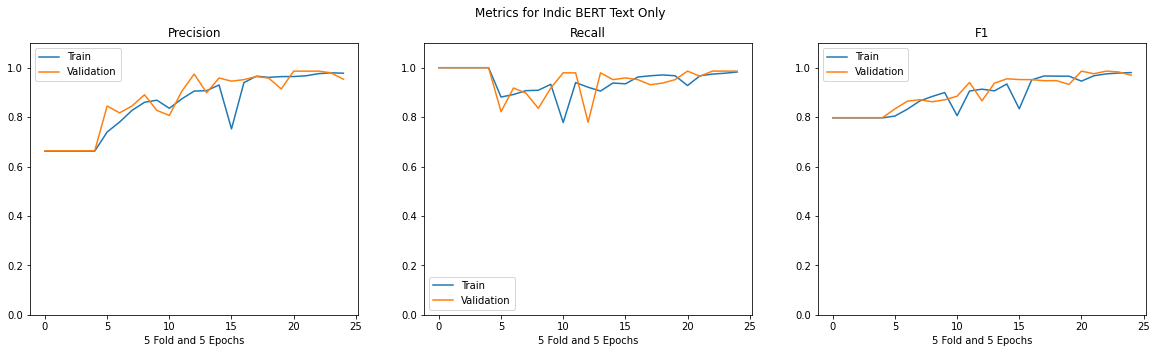

In [8]:
plot_results(txt_results,'Indic BERT Text Only')

In [9]:
fusion_results = k_fold_model_preparation(indic_model, gpu, True, data, sequences, attention_masks, targets,
                             k_folds=5, epochs=5, balance_classes=False, dropout_level=0.5)

Running Fusion Model
FOLD 0
--------------------------------

 Epoch 1 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.648
Validation Loss: 0.564

 Epoch 2 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.517
Validation Loss: 0.413

 Epoch 3 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.348
Validation Loss: 0.258

 Epoch 4 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.168
Validation Loss: 0.121

 Epoch 5 / 5
Training Model
  Batch    20  of     55.
  Batch    40  of     55.
Evaluating
Training Loss: 0.062
Validation Loss: 0.199
On Train Data
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       296
           1       0.98      0.99      0.99       581

    accuracy                           0.98       877
   macro avg       0.98    

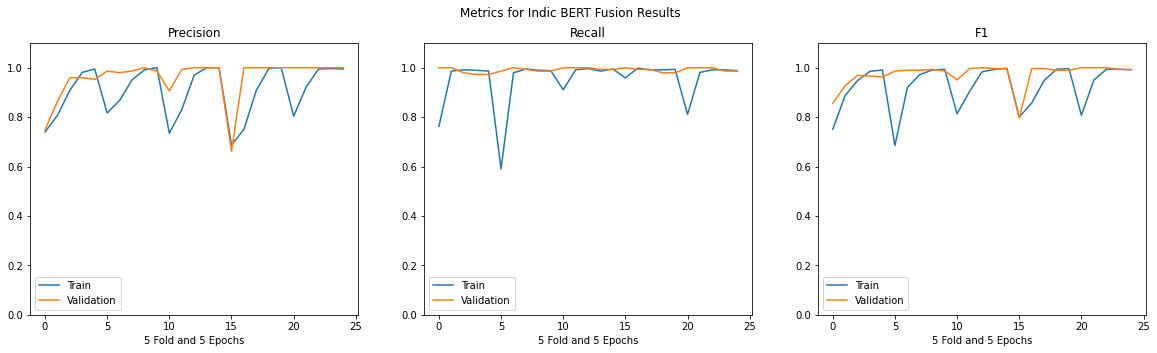

In [10]:
plot_results(fusion_results,'Indic BERT Fusion Results')